<a href="https://colab.research.google.com/github/bloyal/Deep-Learning-with-Python/blob/main/Deep_Learning_With_Python_Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

## Constant tensors and Variables

In [2]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros([2,1])
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [4]:
x = tf.random.normal([3,1], mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.1421423 ]
 [-1.1470977 ]
 [ 0.54192114]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform([3,1], minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.958539 ]
 [0.7421893]
 [0.7128018]], shape=(3, 1), dtype=float32)


In [6]:
import numpy as np

Tf tensors aren't assignable, like Numpy arrays

In [7]:
x = np.ones(shape=(2,2))
print(x)
x[0,0] = 2
print(x)

[[1. 1.]
 [1. 1.]]
[[2. 1.]
 [1. 1.]]


In [8]:
x = tf.ones([2,2])
x[0,0]=2

TypeError: ignored

Need to create a tf.Variable instead

In [9]:
v = tf.Variable(initial_value=tf.random.normal([3,1]))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.3231388],
       [ 0.3671157],
       [-1.0971773]], dtype=float32)>


In [10]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [12]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

Doing math in TensorFlow

In [13]:
a = tf.ones((2,2)) * 2
print (a)
b = tf.square(a)
print(b)
c = tf.sqrt(b)
print(c)
d = b + c
print(d)
e = tf.matmul(a,b)
print(e)
e *= d
print(e)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[6. 6.]
 [6. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[96. 96.]
 [96. 96.]], shape=(2, 2), dtype=float32)


## GradientTape API

(In this example, result = X^2 and gradient = 2*X)

In [14]:
input_var = tf.Variable(initial_value=3.)
print(input_var)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
tf.Tensor(6.0, shape=(), dtype=float32)


Watching constant tensor inputs

In [15]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(input_const)
print(gradient)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


Computing second-order gradients (i.e. second derivatives)

In [16]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print("Time is {time:.2f}".format(time=2))
print(speed)
print(position)
print(acceleration)

Time is 2.00
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## E2E linear classifier in pure TF

Create some random data

In [20]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3], cov=[[1, 0.5],[0.5,1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0], cov=[[1, 0.5],[0.5,1]], size=num_samples_per_class)
print(negative_samples)
print(positive_samples)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs)

[[ 0.43718678  3.51403844]
 [ 0.40751711  3.20271549]
 [-0.19330749  2.44843398]
 ...
 [-0.26425024  1.19097128]
 [ 1.36333627  2.36127181]
 [ 0.01594039  2.22019745]]
[[ 3.03152982 -0.13383056]
 [ 3.97921143  0.83740073]
 [ 3.95018421 -0.38353037]
 ...
 [ 1.19563978 -0.95679292]
 [ 2.67321484 -1.25469417]
 [ 3.02087152  1.62960855]]
[[ 0.43718678  3.5140383 ]
 [ 0.4075171   3.2027154 ]
 [-0.19330749  2.4484339 ]
 ...
 [ 1.1956397  -0.95679295]
 [ 2.673215   -1.2546942 ]
 [ 3.0208714   1.6296085 ]]


Generate target labels

In [21]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


Plot input data

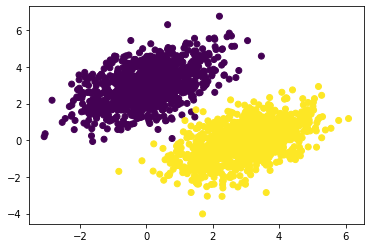

In [22]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

Create the variables needed for the linear classifier

In [24]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(W) # (2x1 vector of starting weights)
print(b) # (Scalar bias value)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.82070124],
       [0.3864491 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


Define the forward pass function

In [25]:
def model(inputs):
  return tf.matmul(inputs, W) + b

Define the loss function

In [26]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses) # collapse to scalar

Define training function

In [27]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions) #Pretty sure this is backwards in book
  #Calculate the gradient of the loss function wrt the weights and bias values
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  #Update the weights and biases, scaled by the learning rate
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

Run training over multiple epochs

In [28]:
for step in range(20):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.7838
Loss at step 1: 0.4015
Loss at step 2: 0.1621
Loss at step 3: 0.1295
Loss at step 4: 0.1181
Loss at step 5: 0.1095
Loss at step 6: 0.1018
Loss at step 7: 0.0949
Loss at step 8: 0.0886
Loss at step 9: 0.0829
Loss at step 10: 0.0777
Loss at step 11: 0.0729
Loss at step 12: 0.0686
Loss at step 13: 0.0647
Loss at step 14: 0.0611
Loss at step 15: 0.0579
Loss at step 16: 0.0549
Loss at step 17: 0.0522
Loss at step 18: 0.0498
Loss at step 19: 0.0476


Plot the results

tf.Tensor(
[[ 0.03702003]
 [ 0.05522633]
 [-0.01937161]
 ...
 [ 0.56431746]
 [ 0.91971886]
 [ 0.76737666]], shape=(2000, 1), dtype=float32)


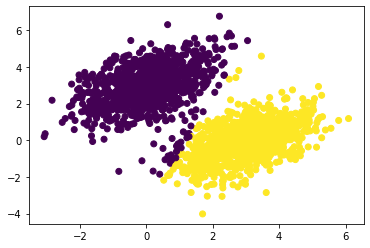

In [29]:
predictions = model(inputs)
print(predictions)
#Slighly updated from book to convert probabilistic predictions to two categories
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
plt.show()

Add the classification line

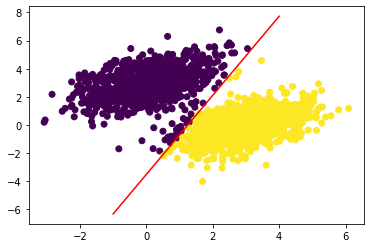

In [30]:
x = np.linspace(-1,4,100)
y = - W[0]/W[1]*x + (0.5-b)/W[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)

## Using Keras Layers

Reproducing the `NaiveDense` class using Keras layers

In [31]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units),
                             initializer = "random_normal")
    self.b = self.add_weight(shape=(self.units,),
                             initializer = "zeros")
    
  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [32]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones((2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


Automatic shape inference

In [33]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [34]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
                           layers.Dense(32, activation="relu"),
                           layers.Dense(32)
])

From layers to models

In [36]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
             loss="mean_squared_error",
             metrics=["accuracy"])

In [38]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [39]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 5.7910 - binary_accuracy: 0.0045
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 5.5134 - binary_accuracy: 0.0050
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 5.2808 - binary_accuracy: 0.0055
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 5.0589 - binary_accuracy: 0.0060
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 4.8415 - binary_accuracy: 0.0070


In [40]:
history.history

{'binary_accuracy': [0.0044999998062849045,
  0.004999999888241291,
  0.005499999970197678,
  0.006000000052154064,
  0.007000000216066837],
 'loss': [5.790950775146484,
  5.5133514404296875,
  5.280767440795898,
  5.058933258056641,
  4.841546535491943]}

Using the validation data argument

In [44]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=keras.metrics.BinaryAccuracy())

#generate a random array of indices
indices_permutation = np.random.permutation(len(inputs))
#randomly assign inputs to shuffled_inputs
shuffled_inputs = inputs[indices_permutation]
#randomly assign targets to shuffled_targets
shuffled_targets = targets[indices_permutation]

#Assign 30% of the inputs and targets to the validation set
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[-num_validation_samples:]
val_targets = shuffled_targets[-num_validation_samples:]
#Assign another 30% of the inputs and targers to the training set
training_inputs = shuffled_inputs[:num_validation_samples]
training_targets = shuffled_targets[:num_validation_samples]

model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)


Epoch 1/5
38/38 [==============================] - 1s 7ms/step - loss: 0.1354 - binary_accuracy: 0.9467 - val_loss: 0.0600 - val_binary_accuracy: 0.9817
Epoch 2/5
38/38 [==============================] - 0s 4ms/step - loss: 0.0780 - binary_accuracy: 0.9583 - val_loss: 0.0373 - val_binary_accuracy: 0.9950
Epoch 3/5
38/38 [==============================] - 0s 3ms/step - loss: 0.0744 - binary_accuracy: 0.9600 - val_loss: 0.0337 - val_binary_accuracy: 0.9967
Epoch 4/5
38/38 [==============================] - 0s 4ms/step - loss: 0.0754 - binary_accuracy: 0.9600 - val_loss: 0.0359 - val_binary_accuracy: 0.9950
Epoch 5/5
38/38 [==============================] - 0s 4ms/step - loss: 0.0790 - binary_accuracy: 0.9583 - val_loss: 0.0339 - val_binary_accuracy: 0.9950


In [45]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 3ms/step - loss: 0.0339 - binary_accuracy: 0.9950


Inference: Using a model after traingin

In [47]:
predictions = model.predict(inputs[:10], batch_size=128)

In [48]:
print(predictions)

[[-0.04814404]
 [-0.00232875]
 [ 0.04256314]
 [-0.24128711]
 [ 0.00299609]
 [ 0.25493327]
 [-0.00262171]
 [ 0.09260294]
 [-0.07096636]
 [-0.21574706]]
